In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_rewards(filename, samples, episodes):
    rewards = []
    with open(filename, "r") as f:
        for i in range(samples):
            rew_sum = 0
            for j in range(episodes):
                line = f.readline()
                rew = float(line.split()[-1])
                rew_sum += rew
            rewards.append(rew_sum / episodes)
    return rewards

In [7]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [10]:
samples = 2000
episodes = 10
ours = read_rewards("results_test/CartPole-v0_vpg_s2000_n10_every10_size32_c0.5_tau0.5.txt", samples, episodes)
maml = read_rewards("results_test/maml_CartPole-v0_vpg_s2000_n10_every10_size32.txt", samples, episodes)

In [25]:
ours_50 = read_rewards("results_test/CartPole-v0_vpg_s2000_n10_every50_size32_c0.5_tau0.5.txt", samples, episodes)

In [30]:
ours_50_lr = read_rewards("results_test/CartPole-v0_vpg_s2000_n10_every50_size32_c0.5_tau0.5.txt", samples, episodes)

In [32]:
maml_sgd = read_rewards("results_test/maml_CartPole-v0_vpg_s2000_n10_every10_size32.txt", samples, episodes)

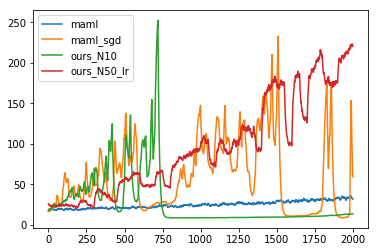

In [38]:
plt.plot(smooth(maml, 0.9), label="maml")
plt.plot(smooth(maml_sgd, 0.9), label="maml_sgd")
plt.plot(smooth(ours, 0.9), label="ours_N10")
# plt.plot(smooth(ours_50, 0.9), label="ours_N50")
plt.plot(smooth(ours_50_lr, 0.9), label="ours_N50_lr")
plt.legend()
plt.show()